<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/mikyWordCloud/asian_natural_language_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')


In [32]:
def contaparole(x):

  #creazione di una variabile con valore 0
  parole=0
  
  #analizza la stringa partendo dal primo carattere, quando trova uno spazio si blocca ed inserisce la porzione di stringa in una lista (vettore).
  a = x.split(" ")

  #la lista creata potrebbe anche contenere parole composte da un valore vuoto. Tramite il ciclo for si esegue una verifica e vengono contate solo i valori che contengano almeno un carattere che non sia lo spazio.
  for i in a:
    if (i!=""):
      parole = parole + 1

  return parole

In [27]:
# lunghezza media delle recensioni degli asiatici in tutti i ristoranti
asian = res[(res['ethnicity'] == 'asian')]

lenCaratteriTot = -25976  #numero di "<br>" all'interno del testo come caratteri
lenParoleTot = -6494  #numero di "<br>" all'interno del testo
for text in asian['text_review']:
    lenCaratteriTot = len(text) + lenCaratteriTot
    lenParoleTot = contaparole(text) + lenParoleTot

avg_asian_characters_reviews = lenCaratteriTot/(len(asian) - 1)
avg_asian_words_reviews = lenParoleTot/(len(asian) - 1)

print(avg_asian_characters_reviews)   # media dei caratteri scritti dagli asiatici in generale su yelp
print(avg_asian_words_reviews)   # media delle parole scritte dagli asiatici in generale su yelp

718.9670138888889
125.8761574074074


In [28]:
# lunghezza media delle recensioni degli asiatici nei ristoranti americani

asian_american_restaurant = res[(res['ethnicity'] == 'asian') & (res['typology'] == 'American')]

lenCaratteriTot = -8444  #numero di "<br>" all'interno del testo
lenParoleTot = -2111  #numero di "<br>" all'interno del testo

for text in asian_american_restaurant['text_review']:
    lenCaratteriTot = len(text) + lenCaratteriTot
    lenParoleTot = contaparole(text) + lenParoleTot

avg_c_asian_american_restaurant_reviews = lenCaratteriTot/(len(asian_american_restaurant) - 1)
avg_p_asian_american_restaurant_reviews = lenParoleTot/(len(asian_american_restaurant) - 1)

print(avg_c_asian_american_restaurant_reviews)    # media dei caratteri scritti dagli asiatici in generale nei ristoranti americani
print(avg_p_asian_american_restaurant_reviews)   # media delle parole scritte dagli asiatici in generale nei ristoranti americani

731.8741610738255
128.20805369127515


In [29]:
# lunghezza media delle recensioni degli asiatici nei ristoranti messicani
asian_mexican_restaurant = res[(res['ethnicity'] == 'asian') & (res['typology'] == 'Mexican')]

lenCaratteriTot = -2704  #numero di "<br>" all'interno del testo
lenParoleTot = -676  #numero di "<br>" all'interno del testo

for text in asian_mexican_restaurant['text_review']:
    lenCaratteriTot = len(text) + lenCaratteriTot
    lenParoleTot = contaparole(text) + lenParoleTot

avg_c_asian_mexican_restaurant_reviews = lenCaratteriTot/(len(asian_mexican_restaurant) - 1)
avg_p_asian_mexican_restaurant_reviews = lenParoleTot/(len(asian_mexican_restaurant) - 1)

print(avg_c_asian_mexican_restaurant_reviews)    # media dei caratteri scritti dagli asiatici in generale nei ristoranti messicani
print(avg_p_asian_mexican_restaurant_reviews)   # media delle parole scritte dagli asiatici in generale nei ristoranti messicani

565.2455516014235
100.31316725978648


In [30]:
# lunghezza media delle recensioni degli asiatici nei ristoranti asiatici
asian_japanese_restaurant = res[(res['ethnicity'] == 'asian') & (res['typology'] == 'Japanese')]

lenCaratteriTot = -14828  #numero di "<br>" all'interno del testo
lenParoleTot = -3707  #numero di "<br>" all'interno del testo

for text in asian_japanese_restaurant['text_review']:
    lenCaratteriTot = len(text) + lenCaratteriTot
    lenParoleTot = contaparole(text) + lenParoleTot

avg_c_asian_japanese_restaurant_reviews = lenCaratteriTot/(len(asian_japanese_restaurant) - 1)
avg_p_asian_japanese_restaurant_reviews = lenParoleTot/(len(asian_japanese_restaurant) - 1)

print(avg_c_asian_japanese_restaurant_reviews)    # media dei caratteri scritti dagli asiatici in generale nei ristoranti asiatici
print(avg_p_asian_japanese_restaurant_reviews)   # media delle parole scritte dagli asiatici in generale nei ristoranti asiatici

762.4782096584216
132.9964664310954


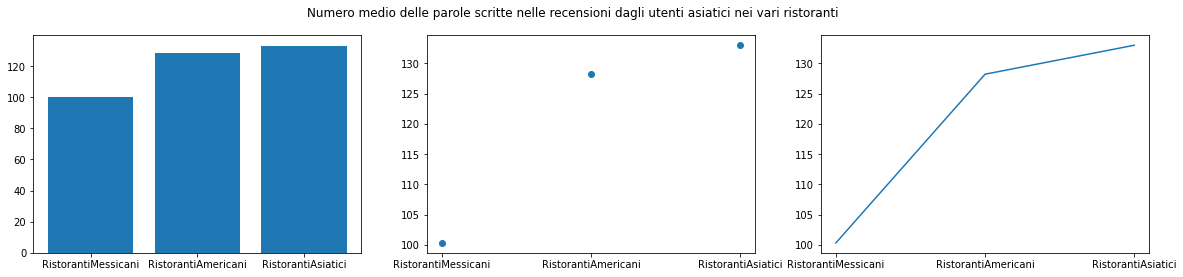

In [62]:
import matplotlib.pyplot as plt

# Asse delle x = ristoranti, Asse delle y = valori delle medie

names = ['RistorantiMessicani', 'RistorantiAmericani', 'RistorantiAsiatici']
values = [avg_p_asian_mexican_restaurant_reviews, avg_p_asian_american_restaurant_reviews, avg_p_asian_japanese_restaurant_reviews]

plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Numero medio delle parole scritte nelle recensioni dagli utenti asiatici nei vari ristoranti')
plt.show()


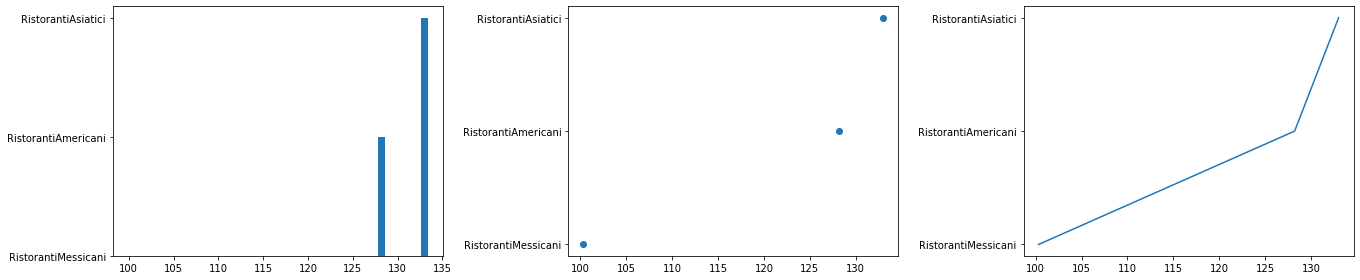

In [57]:
# Asse delle x = valori delle medie, Asse delle y = ristoranti
values = ['RistorantiMessicani', 'RistorantiAmericani', 'RistorantiAsiatici']
names = [avg_p_asian_mexican_restaurant_reviews, avg_p_asian_american_restaurant_reviews, avg_p_asian_japanese_restaurant_reviews]

plt.figure(figsize=(19, 4))

plt.subplot(131)
plt.bar(names, values)
plt.tight_layout()

plt.subplot(132)
plt.scatter(names, values)
plt.tight_layout()

plt.subplot(133)
plt.plot(names, values)

#plt.suptitle('Numero medio delle parole scritte nelle recensioni dagli utenti asiatici nei vari ristoranti')
plt.show()